In [26]:
#required modules
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


In [2]:
#loading data set
weather=pd.read_csv("local_weather.csv",index_col="DATE")
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
01-01-1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-01-1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
03-01-1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-01-1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-01-1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-01-2022,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
25-01-2022,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
26-01-2022,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [3]:
#calculating the percentage of missing data
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

In [4]:
#now taking the actual dataset in account
actual_dataset=weather[["PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()
actual_dataset

,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,
01-01-1960,0.0,0.0,0.0,49.0,30.0
02-01-1960,0.0,0.0,0.0,49.0,29.0
03-01-1960,0.0,0.0,0.0,54.0,35.0
04-01-1960,0.0,0.0,0.0,54.0,36.0
05-01-1960,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
24-01-2022,0.0,NaN,NaN,60.0,39.0
25-01-2022,0.0,NaN,NaN,57.0,43.0
26-01-2022,0.0,NaN,NaN,57.0,41.0


In [5]:
actual_dataset.columns=["Precipitation","Snow","Snow_Depth","Temp_Max","Temp_Min"]
actual_dataset

,Precipitation,Snow,Snow_Depth,Temp_Max,Temp_Min
DATE,,,,,
01-01-1960,0.0,0.0,0.0,49.0,30.0
02-01-1960,0.0,0.0,0.0,49.0,29.0
03-01-1960,0.0,0.0,0.0,54.0,35.0
04-01-1960,0.0,0.0,0.0,54.0,36.0
05-01-1960,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
24-01-2022,0.0,NaN,NaN,60.0,39.0
25-01-2022,0.0,NaN,NaN,57.0,43.0
26-01-2022,0.0,NaN,NaN,57.0,41.0


In [6]:
#calculating the percentage of missing data in actual dataset
actual_dataset.apply(pd.isnull).sum()/actual_dataset.shape[0]

Precipitation    0.016668
Snow             0.324990
Snow_Depth       0.317634
Temp_Max         0.000534
Temp_Min         0.000593
dtype: float64

In [7]:
#no impact on snow & snow_depth so deleted
del actual_dataset["Snow"]
del actual_dataset["Snow_Depth"]

In [8]:
actual_dataset

,Precipitation,Temp_Max,Temp_Min
DATE,,,
01-01-1960,0.0,49.0,30.0
02-01-1960,0.0,49.0,29.0
03-01-1960,0.0,54.0,35.0
04-01-1960,0.0,54.0,36.0
05-01-1960,0.0,55.0,33.0
...,...,...,...
24-01-2022,0.0,60.0,39.0
25-01-2022,0.0,57.0,43.0
26-01-2022,0.0,57.0,41.0


In [9]:
actual_dataset[pd.isnull(actual_dataset["Precipitation"])]

,Precipitation,Temp_Max,Temp_Min
DATE,,,
29-10-1983,NaN,67.0,57.0
30-10-1983,NaN,70.0,63.0
31-10-1983,NaN,69.0,61.0
12-11-1983,NaN,63.0,55.0
13-11-1983,NaN,60.0,50.0
...,...,...,...
15-12-2013,NaN,58.0,33.0
01-05-2016,NaN,80.0,55.0
02-05-2016,NaN,68.0,53.0


In [10]:
#to fill out NaN Values check whether it rained for the most of the days or not
actual_dataset['Precipitation'].value_counts()

0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: Precipitation, Length: 176, dtype: int64

In [11]:
#as seen above most of the days have been with no precipitation hence filling the values with 0
actual_dataset['Precipitation']=actual_dataset['Precipitation'].fillna(0)
actual_dataset['Precipitation'].value_counts()

0.00    13945
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: Precipitation, Length: 176, dtype: int64

In [12]:
#now on to minimum temperature
actual_dataset[pd.isnull(actual_dataset["Temp_Min"])]

,Precipitation,Temp_Max,Temp_Min
DATE,,,
20-11-2004,0.0,NaN,NaN
21-12-2011,0.0,61.0,NaN
22-12-2011,0.0,62.0,NaN
23-12-2011,0.0,56.0,NaN
24-12-2011,0.0,55.0,NaN
25-12-2011,0.0,54.0,NaN
16-06-2013,0.0,NaN,NaN
29-08-2020,0.0,NaN,NaN
08-09-2020,0.0,NaN,NaN


In [13]:
#filling temp_min & temp_max values with forward fill method for whole dataset
actual_dataset=actual_dataset.fillna(method="ffill")
actual_dataset

,Precipitation,Temp_Max,Temp_Min
DATE,,,
01-01-1960,0.0,49.0,30.0
02-01-1960,0.0,49.0,29.0
03-01-1960,0.0,54.0,35.0
04-01-1960,0.0,54.0,36.0
05-01-1960,0.0,55.0,33.0
...,...,...,...
24-01-2022,0.0,60.0,39.0
25-01-2022,0.0,57.0,43.0
26-01-2022,0.0,57.0,41.0


In [14]:
#now calculating the percentage of missing values
actual_dataset.apply(pd.isnull).sum()/actual_dataset.shape[0]

Precipitation    0.0
Temp_Max         0.0
Temp_Min         0.0
dtype: float64

In [15]:
#now converting the data type of the data from object to date_time
actual_dataset.index=pd.to_datetime(actual_dataset.index)
actual_dataset

<ipython-input-15-b652a3fec7c2>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  actual_dataset.index=pd.to_datetime(actual_dataset.index)


,Precipitation,Temp_Max,Temp_Min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-02-01,0.0,49.0,29.0
1960-03-01,0.0,54.0,35.0
1960-04-01,0.0,54.0,36.0
1960-05-01,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [16]:
actual_dataset["target"]=actual_dataset.shift(-1)["Temp_Max"]

In [17]:
actual_dataset

,Precipitation,Temp_Max,Temp_Min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-02-01,0.0,49.0,29.0,54.0
1960-03-01,0.0,54.0,35.0,54.0
1960-04-01,0.0,54.0,36.0,55.0
1960-05-01,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [18]:
#now to remove the NaN value modifiying the dataset as follows
actual_dataset=actual_dataset.iloc[:-1:].copy()
actual_dataset

,Precipitation,Temp_Max,Temp_Min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-02-01,0.0,49.0,29.0,54.0
1960-03-01,0.0,54.0,35.0,54.0
1960-04-01,0.0,54.0,36.0,55.0
1960-05-01,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [19]:
#here we use Ridge Regression model for the purpose of prediction to avoid overfitting
reg=Ridge(alpha=.1)

In [20]:
#prediction phase
predictorsList=["Precipitation","Temp_Max","Temp_Min"]

In [21]:
#splitting up the datas as train and test datas
train=actual_dataset.loc[:"2020-12-31"]
test=actual_dataset.loc["2021-01-01":]
train
test

,Precipitation,Temp_Max,Temp_Min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-02-01,0.14,57.0,51.0,56.0
2021-03-01,0.00,56.0,49.0,62.0
2021-04-01,0.36,62.0,46.0,59.0
2021-05-01,0.00,59.0,42.0,59.0
...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0
2022-01-24,0.00,60.0,39.0,57.0
2022-01-25,0.00,57.0,43.0,57.0


In [22]:
reg.fit(train[predictorsList],train["target"])

Ridge(alpha=0.1)

In [24]:
predictions=reg.predict(test[predictorsList])

In [27]:
#calculating the deviation_value
mean_absolute_error(test["target"],predictions)

3.4111699434528306

In [30]:
combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
combined.columns=['actual','predictions']
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-02-01,56.0,59.310181
2021-03-01,62.0,58.538685
2021-04-01,59.0,61.531814
2021-05-01,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<Axes: xlabel='DATE'>

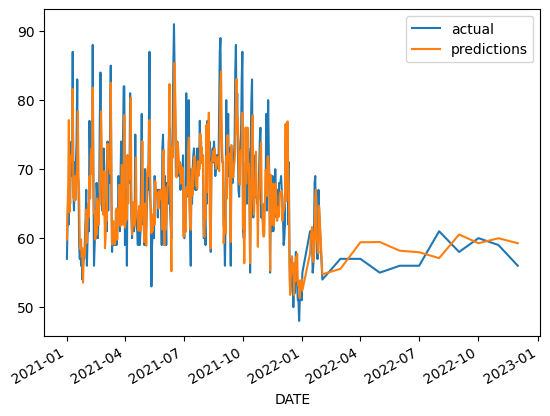

In [31]:
#representing in graph format
combined.plot()

In [32]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [33]:
#to make the predictions call easier defining a function for the prediction
def makePredictions(predictorsList,actual_dataset,reg):
  train=actual_dataset.loc[:"2020-12-31"]
  test=actual_dataset.loc["2021-01-01":]
  reg.fit(train[predictorsList],train["target"])
  predictions=reg.predict(test[predictorsList])
  error=mean_absolute_error(test["target"],predictions)
  combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
  combined.columns=['actual','predictions']
  return error,combined

In [35]:
actual_dataset["month_max"]=actual_dataset["Temp_Max"].rolling(30).mean()
actual_dataset

,Precipitation,Temp_Max,Temp_Min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-02-01,0.0,49.0,29.0,54.0,NaN
1960-03-01,0.0,54.0,35.0,54.0,NaN
1960-04-01,0.0,54.0,36.0,55.0,NaN
1960-05-01,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


In [40]:
actual_dataset["month_day_max"]=actual_dataset["month_max"]/actual_dataset["Temp_Max"]
actual_dataset["max_min"]=actual_dataset["Temp_Max"]/actual_dataset["Temp_Min"]
actual_dataset

,Precipitation,Temp_Max,Temp_Min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN,1.633333
1960-02-01,0.0,49.0,29.0,54.0,NaN,NaN,1.689655
1960-03-01,0.0,54.0,35.0,54.0,NaN,NaN,1.542857
1960-04-01,0.0,54.0,36.0,55.0,NaN,NaN,1.500000
1960-05-01,0.0,55.0,33.0,53.0,NaN,NaN,1.666667
...,...,...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.0,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.0,57.0,43.0,57.0,57.200000,1.003509,1.325581


In [41]:
actual_dataset = actual_dataset.iloc[30:,:].copy()

In [43]:
predictors = ["Precipitation", "Temp_Max", "Temp_Min", "month_day_max", "max_min"]

error, combined = makePredictions(predictors, actual_dataset, reg)
error

3.358053753615785

In [47]:
actual_dataset["monthly_avg"] = actual_dataset["Temp_Max"].groupby(actual_dataset.index.month).apply(lambda x: x.expanding(1).mean())
actual_dataset["day_of_year_avg"] = actual_dataset["Temp_Max"].groupby(actual_dataset.index.day_of_year).apply(lambda x: x.expanding(1).mean())
actual_dataset

<ipython-input-47-830989285b8d>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  actual_dataset["monthly_avg"] = actual_dataset["Temp_Max"].groupby(actual_dataset.index.month).apply(lambda x: x.expanding(1).mean())
<ipython-input-47-830989285b8d>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  

,Precipitation,Temp_Max,Temp_Min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-01-02,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,60.500000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,59.000000,59.000000
1960-03-02,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,59.000000,59.000000
1960-04-02,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,60.731690,57.130435
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,60.731175,57.239130
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,60.728551,57.347826


In [49]:
error, combined = makePredictions(predictors + ["monthly_avg", "day_of_year_avg"], actual_dataset, reg)
error

3.31586588038341

In [50]:
actual_dataset.corr()["target"]

Precipitation     -0.205413
Temp_Max           0.821650
Temp_Min           0.596016
target             1.000000
month_max          0.686842
month_day_max     -0.421537
max_min            0.045228
monthly_avg        0.429644
day_of_year_avg    0.692168
Name: target, dtype: float64

In [51]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.775584,14.224416
2021-01-04,62.0,75.627081,13.627081
2021-07-05,81.0,67.408312,13.591688
2021-02-21,77.0,64.207581,12.792419
2021-10-16,66.0,78.774342,12.774342
2021-02-22,84.0,71.619104,12.380896
2021-03-30,82.0,70.076244,11.923756
2021-07-07,79.0,67.115773,11.884227
2021-04-10,69.0,80.784320,11.784320
